`Task 1 :`**Titanic survival prediction**

`Done by:Mohamad Moallem`

below will be the area where all the libraries we need will be called 

In [1]:
import pandas as pd#for cleaning and manipulating data#
import numpy as np#for mathmatical computation and array manipulation#
import matplotlib.pyplot as plt#for data visualization#
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

first lets load our data set and check it out before we start 

In [2]:
data_set=pd.read_csv("Titanic-Dataset.csv")#loading the data set into data_set#
data_set.head()#showing the first 5 rows from the data set#

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


now that we loaded the data set we should examine it and check for missing values 

In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


from the above meta data we can see that there are missing data in the **Age column :** `177 rows` and **Cabin column :** `687 rows` now for the age column it is better to fill the missing values with the median as for the cabin which has around 77% missing data and its data type being an object its better to consider its impact on the prediction if it has low correlation with the targeted result but it has 147 distinct values which is problematic for one_hot encoding so it is better to drop it.

we can check the correlation real quick using the heatmap in the seaborn library 

<Axes: >

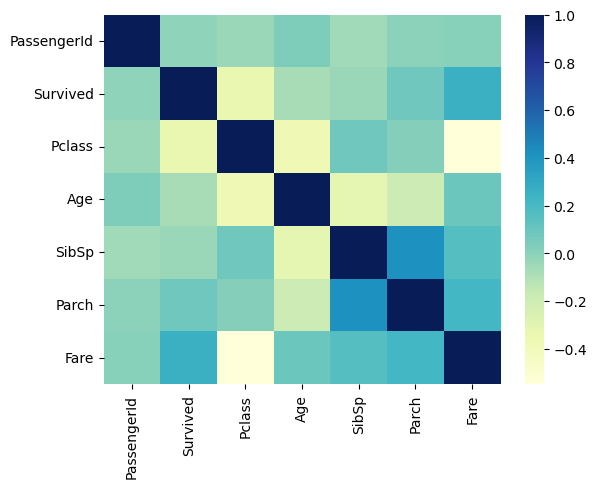

In [5]:
sns.heatmap(data_set.corr(numeric_only=True),cmap='YlGnBu')

first lets start by filling the missing values in the age column

In [6]:
data_set['Age'].fillna(data_set['Age'].mean(),inplace=True)
print(data_set['Age'].isnull().sum())#this should print 0 if all the missing values are filled correctly

0


C:\Users\Mohamad Moallem\AppData\Local\Temp\ipykernel_21828\4211646348.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_set['Age'].fillna(data_set['Age'].mean(),inplace=True)


In [7]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


lets check for duplicated values

In [8]:
data_set.duplicated().sum()

0

we have no duplicated values in our data set

before checking the correlation between column and the target varaible lets drop the columns that obviously do not have effect on the survavabilty factor of the individual such as the name,ticket,also cabin for the reasons stated above  

In [9]:
data_set.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [10]:
data_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


now lets do some data visualization like the number of people who survived and much more

In [11]:
data_set['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='count'>

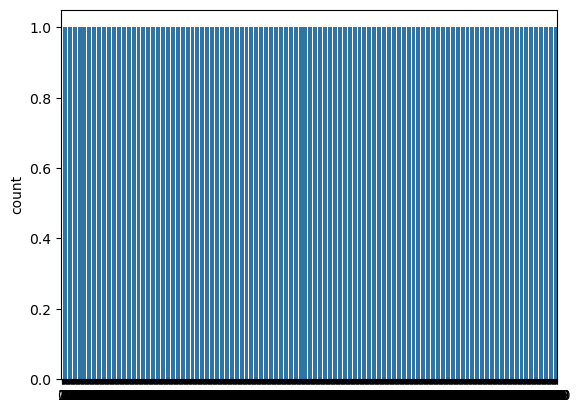

In [40]:
sns.countplot(data_set['Survived'])

we can see that the number of peoples who survived is less than that of the people who have died in the incedint

In [13]:
data_set['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Sex'>

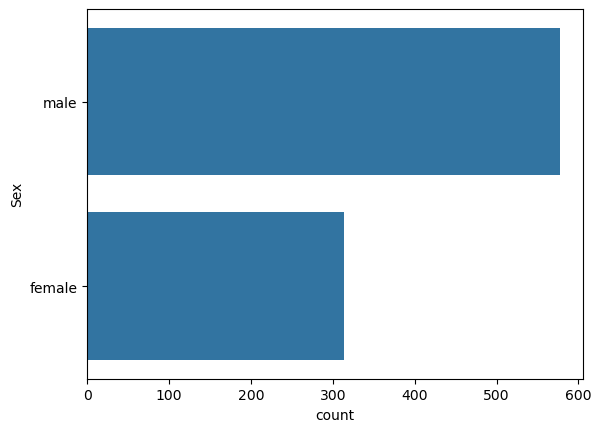

In [14]:
sns.countplot(data_set['Sex'])

we can see that the number of males on the ship was greater than the number of females

<Axes: xlabel='Sex', ylabel='count'>

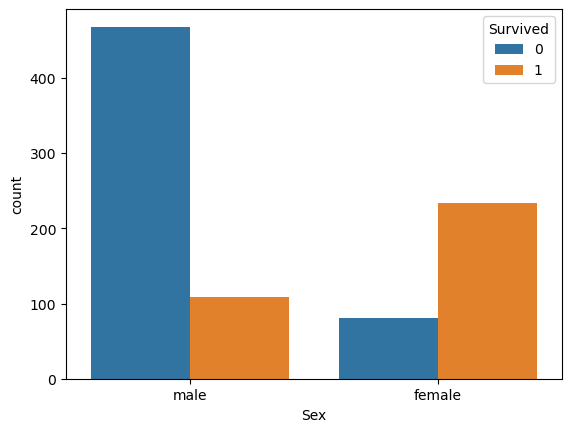

In [15]:
sns.countplot(x='Sex', hue='Survived', data=data_set)#Checking Gender wise survival

we can see that even tho the majority of passangers are male almost double amount of females have survived than the males

<Axes: xlabel='Pclass', ylabel='count'>

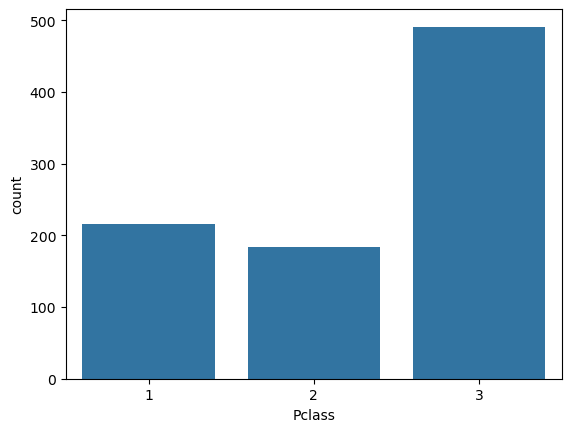

In [16]:
sns.countplot(x='Pclass',data=data_set)

<Axes: xlabel='Pclass', ylabel='count'>

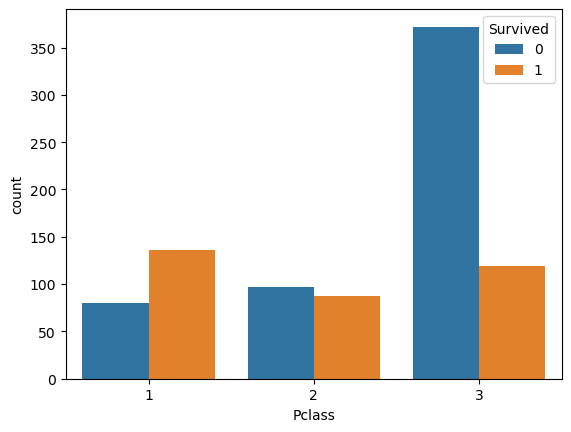

In [17]:
sns.countplot(x='Pclass',hue='Survived',data=data_set)

we can see that people with 1st class seats all and more survived while with 2nd class seats almost all of them as for 3rd class seat a low number survived 

now that we have the columns we need and visulized and understood our data set we can compute there correlation with the target varaible but first we need to convert categorical data in numerical type data (`Sex`) which haas low cardinality male/female, 0/1 ,while `Embarked` it has 3 categories so we need to have 0,1,2 for S,C,Q

In [18]:
data_set['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [19]:
le=LabelEncoder()
data_set['Sex']=le.fit_transform(data_set['Sex'])
data_set['Embarked']=le.fit_transform(data_set['Embarked'])

In [20]:
data_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


lets check if we have any more missing values

In [21]:
data_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

lets check the correlation of columns with the target variable(`Survived`) we can simply do that using correlation matrix

In [22]:
corr_matrix=data_set.corr()#correlation matrix
display(corr_matrix['Survived'].sort_values(ascending=False))


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Embarked      -0.163517
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

we can see that fare has the highest postive corrleation while Sex has the highest negative correlation

now our data set is ready to train a model since our data is labeled we should use a supervised learning model i will use logistic regression for this data set since also it is a binary classification model and we want to binary classify if the individual has survived(1) and not survived(0)

but first we should split our data into training and testing data

In [23]:
X = data_set.drop('Survived', axis=1)
y = data_set['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,train_size=0.8, random_state=42)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 8)
(179, 8)
(712,)
(179,)


after splitting our data into testing and training we can now trian our model

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Mohamad Moallem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

now our model is trained using our training data all thats left is to test its accuracy

In [26]:
y_pred = model.predict(X_test) # predicted the output

In [27]:
display(y_pred)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

we can visiualize our prediction for this classification model using an ROC curve

In [28]:
recall_score(y_test,y_pred)

0.6891891891891891

In [29]:
precision_score(y_test,y_pred)

0.7611940298507462

In [30]:
accuracy_score(y_test,y_pred)

0.7821229050279329

from the data above we can see that our model has an accuracy percentage of 78%,precision score is 76%, and recall score 68% which is pretty good and if we want to increase the accuracy we can increase the size of our data set

In [31]:
LogisticRegression_prediction = pd.DataFrame({
    "Prediction": y_pred
})

LogisticRegression_prediction.to_csv("prediction_logistic_regression.csv", index=False)

now lets train another supervised classification model the knn classifier model which might have a better accuracy prediction score or not

In [32]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [33]:
display(y_pred_knn)

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

now lets check the accuracy of the knn model

In [34]:
accuracy_score(y_test,y_pred_knn)

0.5865921787709497

it turns out that logistic regression showed a better result than knn model with n=3 we can try to change the number of neighbor(n) by increasing or decreasing there number

In [35]:
knn1 = KNeighborsClassifier(n_neighbors=4)
knn1.fit(X_train, y_train)

y_pred_knn1 = knn1.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred_knn1)

0.6312849162011173

we can see that the accuracy is increasing so lets continue increaing n until the increase becomes minimal (near to 0)

In [37]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train, y_train)

y_pred_knn2 = knn.predict(X_test)

In [38]:
accuracy_score(y_test,y_pred_knn2)

0.5865921787709497

we see no longer increase in the accuracy as we increase (n) in the knn model thus reached the max accuracy 63% at n=4 but still the prediction using the logistic regression model is much better at 78.2% accuracy rate